In [1]:
# imports
from data_creation import create_data
from util import read_data, calculate_n_sets, save_ng_result, save_dng_results, read_ng_data, read_ng_test_data, read_dng_data, read_dng_test_data, calculate_route_costs, group_data_by, calculate_route_costs_dmp
from routing import dynamic_ng_pathing, ng_routing
from computational_experiment import test_delta1_for_ng_routing, test_delta1_and_delta2_for_dng_pathing
from classes import SortOption
from visualize import visualize_route, visualize_nodes
from nearest_neighbor import find_nearest_neighbours_path
from routing_test import ng_routing_test

import matplotlib.pyplot as plt
import shutil
import os
from statistics import mean

In [2]:
path = '/Users/lukas/Documents/Master Thesis/'

In [3]:
# what to do
create_new_data = False
clear_exports = True

conduct_nn_routing = True
conduct_ng_routing = True
conduct_dng_pathing = True
conduct_ng_testing = True
conduct_dng_testing = True

In [4]:
# Data Creation Parameters
amount = 10
range_x = 200
range_y = 200

In [5]:
# Hyper Parameters
starting_node = 0
delta1 = 12
delta2 = 15

In [6]:
# Testing Parameters:
iterations_ng = 20
iterations_dng = 5

In [7]:
if os.path.isdir(path + "export"):
    if clear_exports:
        shutil.rmtree(path + "export")

In [8]:
# Data preparation
if create_new_data:
    create_data(amount, range_x, range_y, path)

costs_list, nodes = read_data(path)
node_objects = calculate_n_sets(costs_list, nodes, delta1)
to_visit = list(range(0, len(nodes)))
to_visit.remove(starting_node)

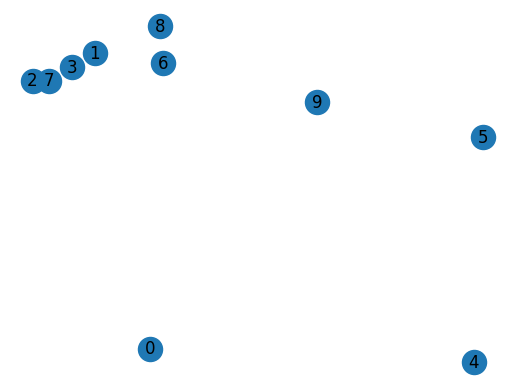

In [9]:
visualize_nodes(nodes)

Nearest Neighbor

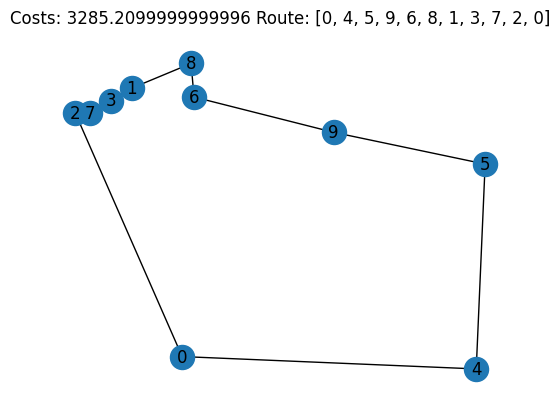

In [10]:
nn_route = find_nearest_neighbours_path(nodes.copy(), costs_list, starting_node)
upper_bound = calculate_route_costs_dmp(nn_route, costs_list)

if conduct_nn_routing:
    visualize_route(nodes, nn_route, calculate_route_costs_dmp(nn_route, costs_list), True, "nn_route", 0, path)

Ng-Routing

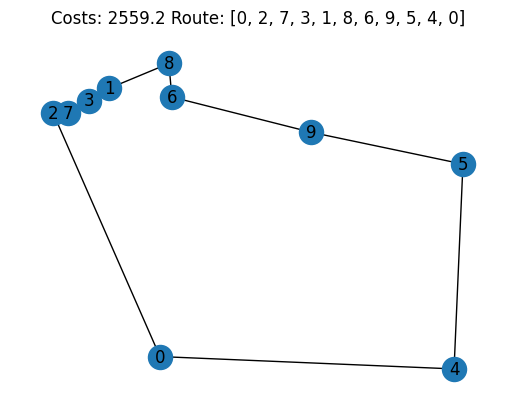

In [11]:
if conduct_ng_routing:
    save_ng_result(path, ng_routing(starting_node, node_objects.copy(), costs_list, upper_bound))
    ng_data = read_ng_data(path)
    visualize_route(nodes, ng_data.best_route, ng_data.cost, True, "ng_route", 0, path)

In [12]:
# if conduct_ng_routing:
#     save_ng_result(path, ng_routing_test(starting_node, node_objects.copy(), costs_list, upper_bound_dmp))
#     ng_data = read_ng_data(path)
#     visualize_route(nodes, ng_data.best_route, ng_data.cost, True, "ng_route", 0, path)

Dynamic Ng-Pathing


Best Route in iteration: 1
[0, 2, 7, 3, 1, 8, 6, 9, 5, 4, 0]
Costs : 2559.2


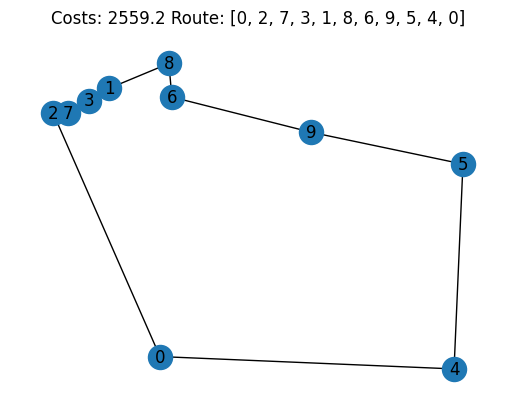

In [13]:
if conduct_dng_pathing:
    dng_result, results = dynamic_ng_pathing(starting_node, node_objects.copy(), costs_list, delta2, upper_bound)
    save_dng_results(path, results)
    dng_data = read_dng_data(path)
    for i in range(0, len(dng_data)):
        plt.figure(i)
        visualize_route(nodes, dng_data[i].best_route, dng_data[i].cost, True, "dng_route_iteration", i+1, path)

Ng Testing

Data generation done
Iteration 1 done
Data generation done
Iteration 2 done
Data generation done
Iteration 3 done
Data generation done
Iteration 4 done
Data generation done
Iteration 5 done
Data generation done
Iteration 6 done
Data generation done
Iteration 7 done
Data generation done
Iteration 8 done
Data generation done
Iteration 9 done
Data generation done
Iteration 10 done
Data generation done
Iteration 11 done
Data generation done
Iteration 12 done
Data generation done
Iteration 13 done
Data generation done
Iteration 14 done
Data generation done
Iteration 15 done
Data generation done
Iteration 16 done
Data generation done
Iteration 17 done
Data generation done
Iteration 18 done
Data generation done
Iteration 19 done
Data generation done
Iteration 20 done

Data of 20 iterations

Finding Mean Delta1 for permitted solutions
7.7

Finding mean decrease of iterations for increase in delta1
-65.461

Finding mean decrease in time for increase in delta1
-0.0

Finding mean decrease in card

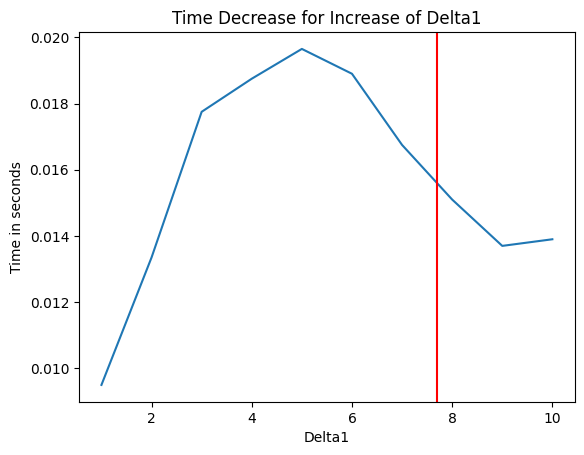

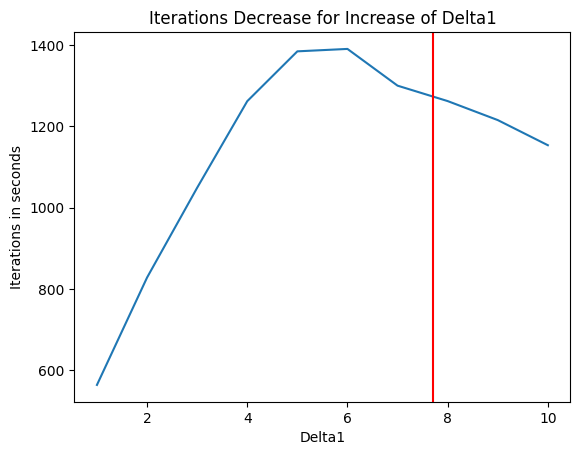

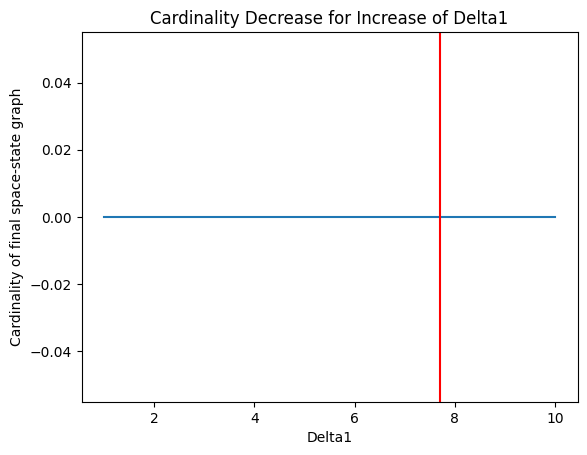

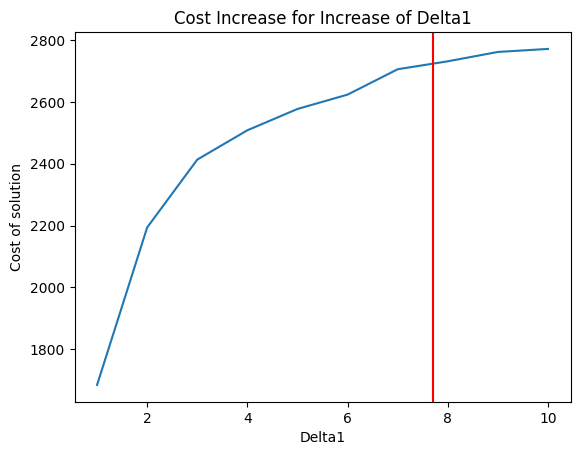

In [14]:
if conduct_ng_testing:
    test_delta1_for_ng_routing(path, amount, range_x, range_y, starting_node, iterations_ng)
    ng_test_data = read_ng_test_data(path)

    delta1_array = []
    for i in range(len(ng_test_data[0])):
        delta1_array.append(i+1)

    elementary_delta1 = []
    for result_list in ng_test_data:
        for result in result_list:
            if result.elementary:
                elementary_delta1.append(result.delta1)
                break

    time_difference = []
    cardinality_difference = []
    iter_difference = []
    for result_list in ng_test_data:
        for i in range(0, len(result_list)-1):
            time_difference.append(result_list[i].time - result_list[i+1].time)
            cardinality_difference.append(result_list[i].cardinality - result_list[i+1].cardinality)
            iter_difference.append(result_list[i].ng_iterations - result_list[i+1].ng_iterations)


    time_per_delta1 = []
    cardinality_per_delta1 = []
    cost_per_delta1 = []
    iter_per_delta1 = []

    for i in ng_test_data[0]:
        time_per_delta1.append([])
        cardinality_per_delta1.append([])
        cost_per_delta1.append([])
        iter_per_delta1.append([])

    for i in range(len(ng_test_data)):
        for j in range(len(ng_test_data[i])):
            time_per_delta1[j].append(ng_test_data[i][j].time)
            cardinality_per_delta1[j].append(ng_test_data[i][j].cardinality)
            cost_per_delta1[j].append(ng_test_data[i][j].cost)
            iter_per_delta1[j].append(ng_test_data[i][j].ng_iterations)

    mean_time_per_delta1 = []
    for array in time_per_delta1:
        mean_time_per_delta1.append(mean(array))

    mean_iter_per_delta1 = []
    for array in iter_per_delta1:
        mean_iter_per_delta1.append(mean(array))

    mean_cardinality_per_delta1 = []
    for array in cardinality_per_delta1:
        mean_cardinality_per_delta1.append(mean(array))

    mean_cost_per_delta1 = []
    for array in cost_per_delta1:
        mean_cost_per_delta1.append(mean(array))

    print()
    print("Data of " + str(len(ng_test_data)) + " iterations")

    print()
    print("Finding Mean Delta1 for permitted solutions")
    print(round(mean(elementary_delta1), 3))
    print()

    print("Finding mean decrease of iterations for increase in delta1")
    print(round(mean(iter_difference), 3))
    print()

    print("Finding mean decrease in time for increase in delta1")
    print(round(mean(time_difference), 3))
    print()

    print("Finding mean decrease in cardinality for increase of delta1")
    print(round(mean(cardinality_difference), 3))

    # TODO plot mean_time_per_delta1 and mean_cardinality_per_delta1
    plt.figure(1)
    plt.title("Time Decrease for Increase of Delta1")
    plt.plot(delta1_array, mean_time_per_delta1)
    plt.ylabel('Time in seconds')
    plt.xlabel('Delta1')
    plt.axvline(x = round(mean(elementary_delta1), 3), color = 'r')
    plt.show()

    plt.figure(2)
    plt.title("Iterations Decrease for Increase of Delta1")
    plt.plot(delta1_array, mean_iter_per_delta1)
    plt.ylabel('Iterations in seconds')
    plt.xlabel('Delta1')
    plt.axvline(x = round(mean(elementary_delta1), 3), color = 'r')
    plt.show()

    plt.figure(3)
    plt.title("Cardinality Decrease for Increase of Delta1")
    plt.plot(delta1_array, mean_cardinality_per_delta1)
    plt.ylabel('Cardinality of final space-state graph')
    plt.xlabel('Delta1')
    plt.axvline(x = round(mean(elementary_delta1), 3), color = 'r')
    plt.show()

    plt.figure(4)
    plt.title("Cost Increase for Increase of Delta1")
    plt.plot(delta1_array, mean_cost_per_delta1)
    plt.ylabel('Cost of solution')
    plt.xlabel('Delta1')
    plt.axvline(x = round(mean(elementary_delta1), 3), color = 'r')
    plt.show()

Dng Testing

Data generation done

1. Iteration
[0, 4, 9, 4, 9, 4, 9, 4, 9, 4, 0]
Costs : 2146.54
Sub Routes:
[[4, 9, 4], [9, 4, 9], [4, 9, 4], [9, 4, 9], [4, 9, 4], [9, 4, 9], [4, 9, 4]]

Delta 2 exceeded
best_route:
[0, 4, 9, 4, 9, 4, 9, 4, 9, 4, 0]
Costs : 2146.54

1. Iteration
[0, 4, 9, 4, 9, 4, 9, 4, 9, 4, 0]
Costs : 2146.54
Sub Routes:
[[4, 9, 4], [9, 4, 9], [4, 9, 4], [9, 4, 9], [4, 9, 4], [9, 4, 9], [4, 9, 4]]

2. Iteration
[0, 4, 9, 6, 9, 4, 9, 6, 9, 4, 0]
Costs : 2160.4
Sub Routes:
[[9, 6, 9], [4, 9, 6, 9, 4], [9, 4, 9], [6, 9, 4, 9, 6], [9, 6, 9], [4, 9, 6, 9, 4]]

3. Iteration
[0, 4, 9, 7, 9, 4, 9, 7, 9, 4, 0]
Costs : 2258.74
Sub Routes:
[[9, 7, 9], [4, 9, 7, 9, 4], [9, 4, 9], [7, 9, 4, 9, 7], [9, 7, 9], [4, 9, 7, 9, 4]]

4. Iteration
[0, 4, 9, 6, 8, 6, 9, 4, 9, 6, 0]
Costs : 2282.03
Sub Routes:
[[6, 8, 6], [9, 6, 8, 6, 9], [4, 9, 6, 8, 6, 9, 4], [9, 4, 9], [6, 9, 4, 9, 6]]

5. Iteration
[0, 4, 9, 6, 4, 9, 6, 4, 9, 6, 0]
Costs : 2323.07
Sub Routes:
[[4, 9, 6, 4], [9, 6, 4, 9], [6, 4, 9,

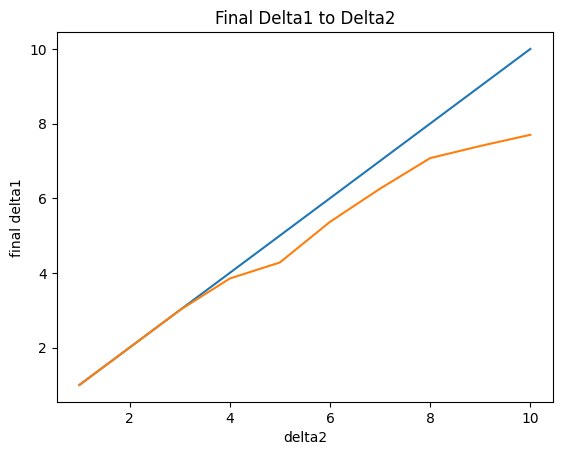

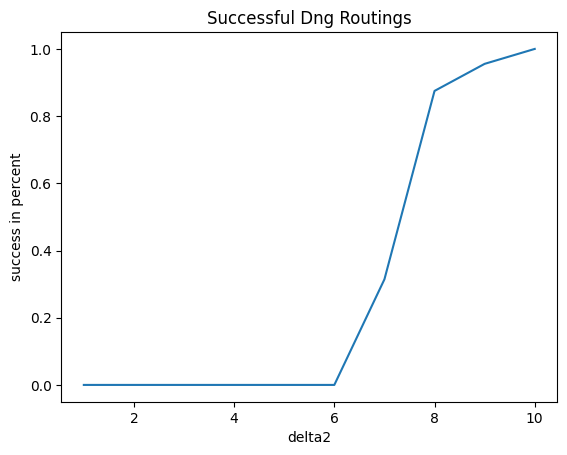

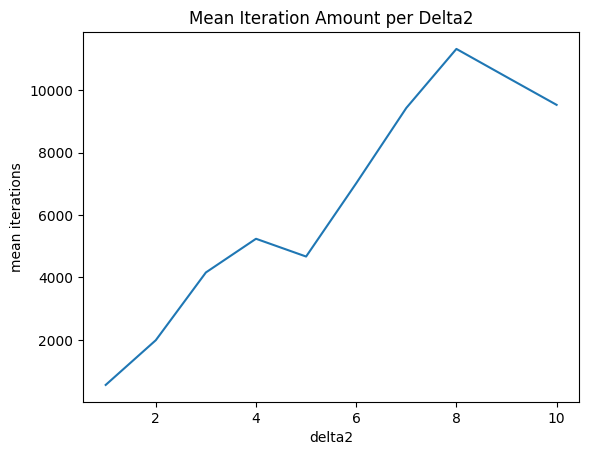

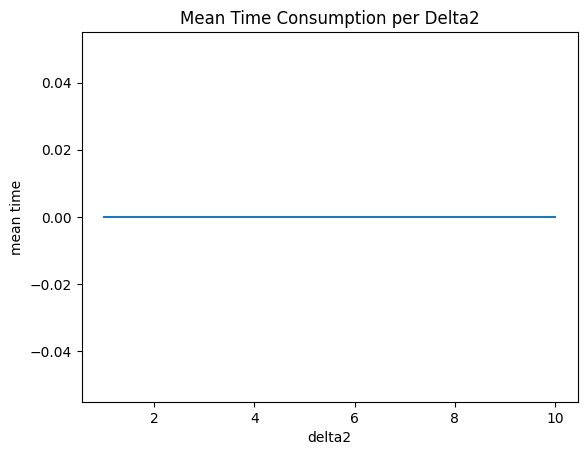

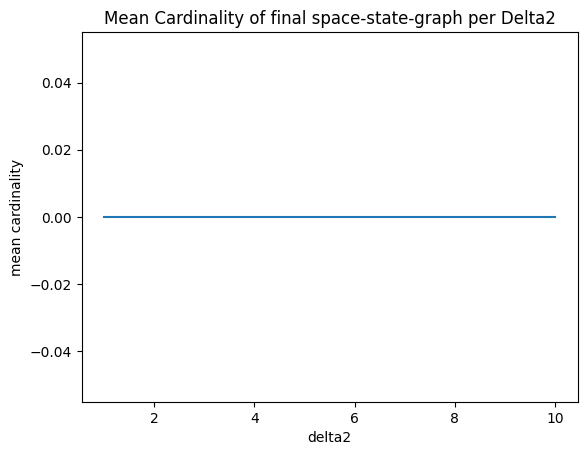

In [15]:
if conduct_dng_testing:
    test_delta1_and_delta2_for_dng_pathing(path, amount, range_x, range_y, starting_node, iterations_dng)
    dng_test_data = read_dng_test_data(path)

    all_test_data = []
    for document in dng_test_data:
        all_test_data.extend(document)

    sorted_delta2 = group_data_by(all_test_data, SortOption.delta2)
    elementary, not_elementary = group_data_by(all_test_data, SortOption.elementary)
    sorted_iterations = group_data_by(all_test_data, SortOption.iterations)
    sorted_start_delta1 = group_data_by(all_test_data, SortOption.start_delta1)
    sorted_final_delta1 = group_data_by(all_test_data, SortOption.final_delta1)
    exceeded, not_exceeded = group_data_by(all_test_data, SortOption.exceeded)

    delta2_array = []
    for i in range(len(sorted_delta2)):
        delta2_array.append(i+1)

    mean_iterations_per_delta2 = []
    mean_time_per_delta2 = []
    mean_cardinality_per_delta2 = []
    mean_final_delta1_per_delta2 = []
    for delta2_list in sorted_delta2:
        iterations = []
        time = []
        cardinality = []
        final_delta1 = []
        for item in delta2_list:
            iterations.append(item.ng_iterations)
            time.append(item.time)
            cardinality.append(item.cardinality)
            final_delta1.append(item.final_delta1)
        mean_iterations_per_delta2.append(round(mean(iterations)))
        mean_time_per_delta2.append(round(mean(time)))
        mean_cardinality_per_delta2.append(round(mean(cardinality)))
        mean_final_delta1_per_delta2.append(round(mean(final_delta1), 3))

    all_final_delta1 = []
    for item in elementary:
        all_final_delta1.append(item.final_delta1)
    mean_final_delta1 = round(mean(all_final_delta1), 3)

    success_percent_per_delta2 = []
    for delta2_list in sorted_delta2:
        suc = 0
        for item in delta2_list:
            if item.elementary:
                suc += 1
        percent = suc / len(delta2_list)
        success_percent_per_delta2.append(percent)

    plt.figure(5)
    plt.title("Final Delta1 to Delta2")
    plt.plot(delta2_array, delta2_array)
    plt.plot(delta2_array, mean_final_delta1_per_delta2)
    plt.ylabel('final delta1')
    plt.xlabel('delta2')
    plt.savefig(path + "export/" + "Final_Delta1" + "" + ".png", format="PNG")
    plt.show()

    plt.figure(4)
    plt.title("Successful Dng Routings")
    plt.plot(delta2_array, success_percent_per_delta2)
    plt.ylabel('success in percent')
    plt.xlabel('delta2')
    plt.savefig(path + "export/" + "Successful" + "" + ".png", format="PNG")
    plt.show()

    plt.figure(1)
    plt.title("Mean Iteration Amount per Delta2")
    plt.plot(delta2_array, mean_iterations_per_delta2)
    plt.ylabel('mean iterations')
    plt.xlabel('delta2')
    plt.savefig(path + "export/" + "Iteration" + "" + ".png", format="PNG")
    plt.show()

    plt.figure(2)
    plt.title("Mean Time Consumption per Delta2")
    plt.plot(delta2_array, mean_time_per_delta2)
    plt.ylabel('mean time')
    plt.xlabel('delta2')
    plt.savefig(path + "export/" + "Time" + "" + ".png", format="PNG")
    plt.show()

    plt.figure(3)
    plt.title("Mean Cardinality of final space-state-graph per Delta2")
    plt.plot(delta2_array, mean_cardinality_per_delta2)
    plt.ylabel('mean cardinality')
    # plt.axvline(x = mean_final_delta1, color = 'r')
    plt.xlabel('delta2')
    plt.savefig(path + "export/" + "SpaceState" + "" + ".png", format="PNG")
    plt.show()